In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [3]:
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
df = pd.read_csv('../data/spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
# rename columns to something better
df.columns = ['labels', 'data']

In [6]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

#Convert a collection of raw documents to a matrix of TF-IDF features.
#Equivalent to CountVectorizer followed by TfidfTransformer.
# try multiple ways of calculating features
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])
X

# Convert a collection of text documents to a matrix of token counts
#count_vectorizer = CountVectorizer(decode_error='ignore')
#X = count_vectorizer.fit_transform(df['data'])

<5572x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [5]:
# split up the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
exit()

train score: 0.994106616662202
test score: 0.9809679173463839


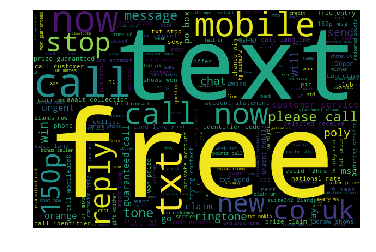

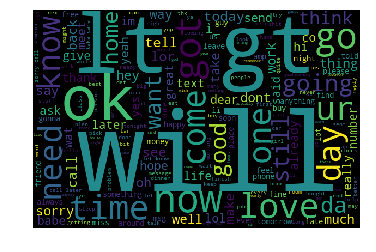

In [6]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')

In [7]:
# see what we're getting wrong
df['predictions'] = model.predict(X)

# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Filthy stories and GIRLS waiting for your
Can U get 2 phone NOW? I wanna chat 2 s

In [8]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

26th OF JULY
Can u get pic msgs to your phone?
\Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx\""
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Host-based IDPS for linux systems.
Total video converter free download type this in google search:)
Audrie lousy autocorrect
Unlimited texts. Limited minutes.
Playin space poker, u?
I sent lanre fakeye's Eckankar details to the mail box
Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
Wewa is 130. Iriver 255. All 128 mb.
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Exec